<a href="https://colab.research.google.com/github/vinitakondhalkar/PythonHackathon/blob/main/PythonHackathon_vinita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#cd '/content/drive/MyDrive/datasets' #after connecting to drive and change file path
import os
os.chdir('/content/drive/MyDrive/PythonHackathon')

In [4]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [165]:
filePath={
    "Patients":"Patients.csv",
    "EDVisits":"EDVisits.csv",
    "AmbulatoryVisits":"AmbulatoryVisits.csv",
    "ReAdmissionRegistry":"ReAdmissionRegistry.csv",
    "Discharges":"Discharges.csv",
    "Providers":"Providers.csv",
    "EDUnique":"EDUnique.csv"
}

In [166]:
Patients=pd.read_csv(filePath['Patients'])
EDVisits=pd.read_csv(filePath['EDVisits'])
AmbulatoryVisits=pd.read_csv(filePath['AmbulatoryVisits'])
ReAdmissionRegistry=pd.read_csv(filePath['ReAdmissionRegistry'])
Discharges=pd.read_csv(filePath['Discharges'])
Providers=pd.read_csv(filePath['Providers'])
EDUnique=pd.read_csv(filePath['EDUnique'])

**12.Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T**

In [157]:
Providers[Providers['ProviderName'].str.startswith("T")]



,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
3,4,Ted Texas,Pediatrics,12/23/1993
7,8,Ted Green,Pediatrics,5/30/1996
8,9,Ted Black,Pediatrics,2/20/1997
18,19,Tyler Conner,Cardiology,7/9/2003
33,34,Tony Creed,PrimaryCare,4/28/2010
36,37,Trent Tye,PrimaryCare,1/12/2013



**13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x  with 2 rows & 2 columns with object oriented**




<Figure size 432x288 with 0 Axes>

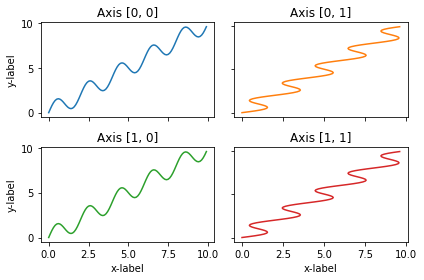

In [28]:
#SOLUTION 1 
#When stacking in two directions, the returned axs is a 2D NumPy array. If you have to set parameters for each subplot it's handy to iterate over all subplots in a 2D grid using for ax in axs.flat:.

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig=plt.figure()
fig, axis = plt.subplots(2, 2)
axis[0, 0].plot(x, y)
axis[0, 0].set_title('Axis [0, 0]')
axis[0, 1].plot(y, x, 'tab:orange')
axis[0, 1].set_title('Axis [0, 1]')
axis[1, 0].plot(x, y, 'tab:green')
axis[1, 0].set_title('Axis [1, 0]')
axis[1, 1].plot(y, x, 'tab:red')
axis[1, 1].set_title('Axis [1, 1]')

for ax in axis.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()

plt.tight_layout()


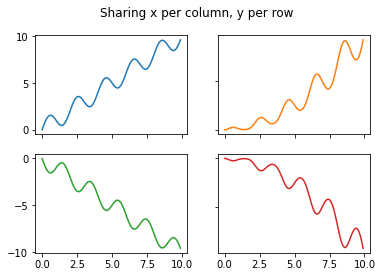

In [36]:
#SOLUTION 2
#You can use tuple-unpacking also in 2D to assign all subplots to dedicated variables:

import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

AttributeError: ignored

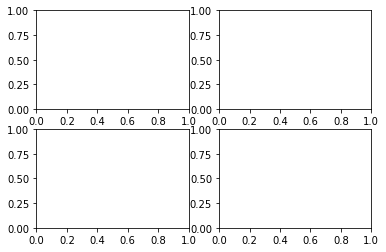

In [45]:
#SOLUTION 3 (not working yet)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
# creating a figure object
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in axis.flat:
    ax.label_outer()

**14.Find the number of null values in BloodPressureSystolic column**

In [50]:
# Count total missing values in a dataframe , returns an integer value
print("Number of null values in BloodPressureSystolic column :",AmbulatoryVisits['BloodPressureSystolic'].isnull().sum())


Number of null values in BloodPressureSystolic column : 124


**15.Replace all the null values in ReadmissionFlag with 0**

In [55]:
#SOLUTION 1
ReAdmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)

#SOLUTION 2
ReAdmissionRegistry["ReadmissionFlag"].replace(to_replace = np.nan, value = 0) 

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

**16.Plot a graph to show the distribution of expected length of stay**

In [66]:
ReAdmissionRegistry['ExpectedLOS'].min()


2.012973923

In [67]:
ReAdmissionRegistry['ExpectedLOS'].max()

16.99821319

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


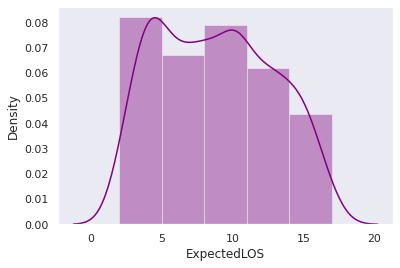

In [80]:
sns.set(style='dark',)
plot=sns.distplot(ReAdmissionRegistry['ExpectedLOS'],kde=True,bins=5,color='purple')
plt.show()

**17.Create a heat map to show the correlation between the column values of Edvisits**

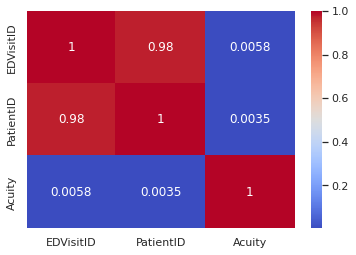

In [83]:
ed_corr=EDVisits.corr()
ed_corr
sns.heatmap(ed_corr,annot=True,cmap='coolwarm')

**18.Add column 'Age' in Patient table**

In [85]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
Patients['Age'] = Patients['DateOfBirth'].apply(age)
Patients



,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1/1/1960,Male,White,English,62
1,2,Far,Myers,11/15/1985,Male,White,English,36
2,3,Devlin,Michael,4/15/1976,Male,White,English,46
3,4,Carmine,Texas,10/15/1968,Male,White,English,53
4,5,Tann,Bama,5/1/1962,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,5/26/1986,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,6/10/1970,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1/8/1983,Male,Black/African-American,English,39
943,944,Panchito,Sharple,6/5/1963,Male,Black/African-American,English,58


**19.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet**

In [99]:

ReAdmissionRegistry.DischargeDate = pd.to_datetime(ReAdmissionRegistry.DischargeDate)
Date_df = ReAdmissionRegistry.DischargeDate.dt.normalize()
Date_df



0     2018-01-04
1     2018-01-04
2     2018-01-04
3     2018-01-05
4     2018-01-05
         ...    
715   2018-03-07
716   2018-03-08
717   2018-03-08
718   2018-03-10
719   2018-03-10
Name: DischargeDate, Length: 720, dtype: datetime64[ns]

**20.Count of number of patients admitted based on Primary Diagnosis and Service provided**

In [104]:
#SOLUTION 1
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].nunique()

PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

In [106]:
#SOLUTION 2
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].size()

PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

In [107]:
#SOLUTION 3
ReAdmissionRegistry.groupby(["PrimaryDiagnosis","Service"])['PatientID'].count()

PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

**21.Which demographic patients are prone to get stroke**

**22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value**

In [122]:
EDVisits_new = EDVisits.set_index(['Acuity','EDDisposition'])
#SOLUTION 1
EDVisits_new.groupby(['Acuity','EDDisposition'])['PatientID'].count()
#SOLUTION 2
EDVisits_new.groupby(level=[0,1])["PatientID"].count()

Acuity  EDDisposition
1       Admitted          32
        Discharged       558
2       Admitted         116
        Discharged        66
3       Admitted          81
4       Admitted         107
        Discharged        30
5       Admitted         179
        Discharged        30
Name: PatientID, dtype: int64

**51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.**

In [22]:
EDVisits[EDVisits['ReasonForVisit'].isin(['Migraine','Pneumonia']) & (EDVisits.Acuity >=2)]


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2:45:40 AM,2:00:01 AM,2,Migraine,Admitted
3,14,14,3:12:19 AM,4:32:29 AM,3,Migraine,Admitted
11,29,29,6:51:29 AM,5:57:02 AM,2,Pneumonia,Admitted
12,30,30,7:25:54 AM,11:30:20 PM,3,Pneumonia,Admitted
13,31,31,7:32:52 AM,7:55:47 PM,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,3:27:07 PM,1:27:32 PM,2,Migraine,Discharged
1150,1104,850,10:46:09 AM,8:52:26 PM,2,Migraine,Discharged
1152,1106,852,11:19:41 AM,2:47:17 AM,2,Migraine,Discharged
1160,1122,868,3:05:59 PM,1:53:03 PM,2,Migraine,Discharged


**52.Retrieve the row with minimum DBP using sorting technique**

In [23]:
AmbulatoryVisits[AmbulatoryVisits.BloodPressureDiastolic == AmbulatoryVisits.BloodPressureDiastolic.min()]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2/8/2019,2/7/2019,7,Follow Up,120.0,51.695653,53.310495,Completed


**53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit**

In [69]:
reason = input("Enter the Reason For Visit : ")
print(reason)
# Printing type of input value
#print ("type of input", type(reason))
filtering = EDVisits['ReasonForVisit'] == reason
EDVisits.where(filtering,inplace=True)
EDVisits.groupby("ReasonForVisit")["PatientID"].count()

  

Enter the Reason For Visit : Fever
Fever


ReasonForVisit
Fever    234
Name: PatientID, dtype: int64

**54.Mortality O.E**

**55.Create a bar chart on service & expected length of stay**

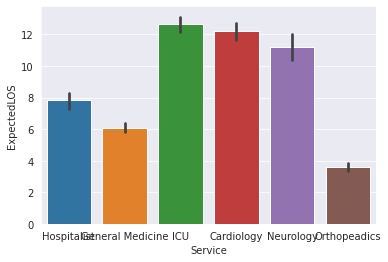

In [72]:
sns.barplot(x='Service',y='ExpectedLOS',data=ReAdmissionRegistry)
sns.set_style('darkgrid')
plt.show()

**56.Count of canceled status**

In [151]:
filtering1 = AmbulatoryVisits['VisitStatus'] == 'Canceled'
AmbulatoryVisits.where(filtering1,inplace=True)
AmbulatoryVisits.groupby(["VisitStatus"])['VisitID'].count()




VisitStatus
Canceled    60
Name: VisitID, dtype: int64

**57.Find the age prone to get stroke**

In [182]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))  
Patients['Age'] = Patients['DateOfBirth'].apply(age)
patients_proneage=Patients.merge(ReAdmissionRegistry[['PatientID', 'PrimaryDiagnosis']])
patients_proneage=patients_proneage[patients_proneage['PrimaryDiagnosis']=='Stroke']
patients_proneage.groupby(["PrimaryDiagnosis","Age"])['PatientID'].count()

#SOLUTION 1
#patients_proneage.groupby(['PrimaryDiagnosis'])['Age'].





PrimaryDiagnosis  Age
Stroke            35     1
                  36     2
                  37     2
                  38     4
                  39     4
                  40     2
                  41     4
                  43     2
                  44     2
                  45     1
                  46     2
                  47     4
                  48     3
                  49     2
                  50     1
                  51     3
                  52     2
                  53     3
                  54     3
                  56     3
                  57     6
                  58     2
                  59     2
                  60     3
                  61     4
                  62     1
Name: PatientID, dtype: int64

**58.Display total count of patients service wise based on gender**

In [105]:
patients_new=Patients.merge(ReAdmissionRegistry[['PatientID', 'Service']])
patients_new.groupby(['Service','Gender'])['PatientID'].count()

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
Name: PatientID, dtype: int64

**59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns**

In [109]:
Providers_new=pd.DataFrame()
Providers_new[['First Name', 'Last Name']] = Providers['ProviderName'].str.split(' ', 1, expand=True)
Providers_new


,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man




```
# This is formatted as code
```

60.Predict the output of the program..
class Acc: 
def __init__(self, id): 
self.id = id
id = 555 

acc = Acc(111) 
print(acc.id)


**81.Display full name of patients**


In [111]:
Patients_fullname = pd.DataFrame()
Patients_fullname['Full Name'] = Patients['FirstName'] + ' ' + Patients['LastName']
Patients_fullname

,Full Name
0,Lanni Sue
1,Far Myers
2,Devlin Michael
3,Carmine Texas
4,Tann Bama
...,...
940,Wat Fideler
941,Wandie Baythrop
942,Diahann Smeeton
943,Panchito Sharple


**82.Retrieve the rows where SBP<140 and DBP<80**

In [150]:
AmbulatoryVisits[(AmbulatoryVisits.BloodPressureSystolic < 140 ) & (AmbulatoryVisits.BloodPressureDiastolic < 80)]
#AmbulatoryVisits.head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,3/13/2019,2/28/2019,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,3/16/2019,2/26/2019,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,1/21/2019,1/7/2019,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,3/19/2019,3/3/2019,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,3/20/2019,3/10/2019,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2/22/2019,2/4/2019,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,3/25/2019,2/26/2019,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2/5/2019,1/10/2019,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2/10/2019,2/2/2019,2,Physical,121.0,64.896818,68.496869,Canceled
